In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LanggraphChatbot"

In [3]:
groq_api_key = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

In [46]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph, END
from langgraph.graph import add_messages

In [47]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages = Annotated[list, add_messages]

In [77]:
def chatbot(state: State):
    print(state)
    return {"messages": [llm.invoke(state["messages"])]}

In [78]:
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder

In [79]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [80]:
graph = graph_builder.compile()

In [81]:
graph

CompiledStateGraph(nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden']}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<messages>(recurse=True, writes=[ChannelWriteEntry(channel='messages', value=<object object at 0x0000022AA2400F20>, skip_none=False, mapper=_get_state_key(recurse=False))]), ChannelWrite<start:chatbot>(recurse=True, writes=[ChannelWriteEntry(channel='start:chatbot', value='__start__', skip_none=False, mapper=None)])]), 'chatbot': PregelNode(config={'tags': []}, channels={'messages': 'messages'}, triggers=['start:chatbot'], mapper=functools.partial(<function _coerce_state at 0x0000022AB1B7A020>, <class '__main__.State'>), writers=[ChannelWrite<chatbot,messages>(recurse=True, writes=[ChannelWriteEntry(channel='chatbot', value='chatbot', skip_none=False, mapper=None), ChannelWriteEntry(channel='messages', value=<object object at 0x0000022AA2400F20>, skip_none=False, mapper=_get_state_key(recurse=False))])])}, channels={'messages': <l

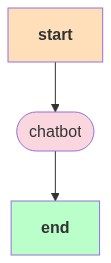

In [82]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [83]:
from langchain_core.messages import HumanMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break

    # ✅ Proper input format
    for event in graph.stream({"messages": [HumanMessage(content=user_input)]}):
        for value in event.values():
            for msg in value["messages"]:
                print("Assistant:", msg.content)


{'messages': [HumanMessage(content='Hi', id='a8a24e89-43b3-4996-adb2-f022c757e95d')]}
Assistant: Hi! 👋

How can I help you today? 😊

{'messages': [HumanMessage(content='What is GenAI', id='bc56d1fa-dc3a-4565-8c29-6c0a370f8838')]}
Assistant: **GenAI** stands for **Generative Artificial Intelligence**. 

It's a type of artificial intelligence that focuses on creating new content, rather than simply analyzing existing data. 

Think of it like this: traditional AI is great at recognizing patterns and making predictions based on what it's already seen. GenAI takes it a step further by learning those patterns and then using them to generate something entirely new.

**Here are some key things to know about GenAI:**

* **Types of Content:** GenAI can create a wide range of content, including:
    * **Text:** Stories, articles, poems, code, dialogue
    * **Images:** Photos, artwork, illustrations
    * **Audio:** Music, sound effects, voiceovers
    * **Video:** Short clips, animations
    * *